<a href="https://colab.research.google.com/github/svshift1/urban_python_svshift/blob/main/module_15/module_15_1_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Введение в Google Colab.</h1>
Google Colab позволяет совместно работать над документами Jupiter Notebook. За бесплатно предоставляет доступ к одному вычислителю NVidia. Из настольных приложений больше всего напоминает VS Code с установленными соответсвующими плагинами. Умеет взаимодействовать с github.

Этот блокнот доступен по <a href="https://github.com/svshift1/urban_python_svshift/blob/main/module_15/module_15_1_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_Google_Colab.ipynb">ссылке</a> на github.

In [29]:
print("hello world")

hello world


In [30]:
import random

random_list=[ random.randint(0,10) for i in range(10)]

def calc_sum(input:list[int]) -> int:
  return sum(input)

print(f'сумма случайных чисел: {calc_sum(random_list)}')

сумма случайных чисел: 42


In [31]:
!pip install numpy matplotlib

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np

A=np.array(random_list)
print(np.mean(A))


4.2


In [33]:
import pandas as pd
from IPython.display import display,HTML
import matplotlib.pyplot as plt


filename='/content/drive/MyDrive/Colab Notebooks/weather.csv'  #если что сохранен на github https://github.com/svshift1/urban_python_svshift/blob/main/module_15/weather.csv

df=pd.read_csv(filename,comment='#',quoting=1,sep=';',skipinitialspace=True )
#df=pd.read_csv('погода.csv',skiprows=6 ,quoting=1,sep=';',skipinitialspace=True )

# при чтении колонки почему-то "съехали". надо переименовать
df.index.name=df.columns[0]
# переименование колонок
# df.rename( {'old':'new', 'old2':'new2'}, axis=1, inplace=True)
df.rename(dict(zip(df.columns[:-1],df.columns[1:])), axis=1,inplace=True)
df.index=pd.to_datetime(df.index, format='%d.%m.%Y %H:%M') # индекс --> дата-время


display(df.iloc[0:5, 0:7])  # остальные колонки малоинформативны и часто пусты


,T,Po,P,Pa,U,DD,Ff
Местное время в Москве (ВДНХ),,,,,,,
2023-08-29 21:00:00,15.2,747.7,761.0,0.2,89,"Штиль, безветрие",0
2023-08-29 18:00:00,15.4,747.5,760.8,0.1,83,"Штиль, безветрие",0
2023-08-29 15:00:00,16.5,747.4,760.6,0.1,69,"Штиль, безветрие",0
2023-08-29 12:00:00,15.9,747.3,760.6,0.4,67,"Ветер, дующий с юго-востока",1
2023-08-29 09:00:00,15.0,746.9,760.2,-0.1,64,"Ветер, дующий с юго-востока",1


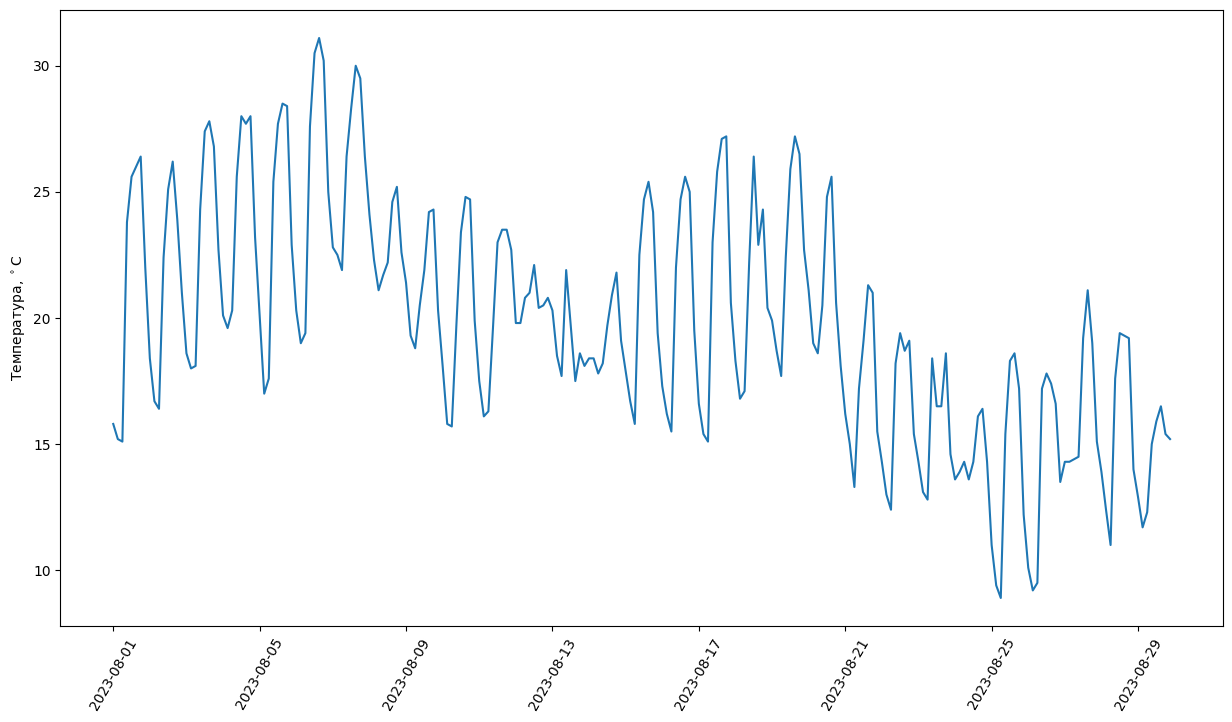

In [44]:
%matplotlib inline

fig,ax=plt.subplots(figsize=[15,8])
plt.plot(df.index, df['T'])
plt.xticks(rotation=60)
plt.ylabel('Температура, $^\circ$C')
plt.show()

In [48]:
# задание 7
import random

# Количество особей в каждом поколении
POPULATION_SIZE = 100

# Валидные гены
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Целевая строка для генерации
#TARGET = "In principio erat Verbum 2000"
TARGET = "Ordem e Progresso"

class Individual(object):
	'''
	Класс, представляющий отдельную особь (индивида) в популяции
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		Создаем случайные гены для мутации
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		Создаем хромосому или набор генов
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def gene_transfer(self, par2):
		'''
		Передаем гены новому поколению индивидов
		'''

		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			# если вероятность меньше 0,45, берем ген
			# от родителя 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# если вероятность между 0.45 и 0.90, берем
			# ген от родителя 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# в противном случае берем случайный ген (мутация),
			else:
				child_chromosome.append(self.mutated_genes())


		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Рассчитываем показатель соответствия, это количество
		символов в строке, которые отличаются от целевой
		строки.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#Текущее поколение
	generation = 1

	found = False
	population = []

	# Новое поколение
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# Отсортируем популяцию в порядке возрастания оценки соответствия целевой функции
		population = sorted(population, key = lambda x:x.fitness)

		# Если у нас появился индивид, достигший целевой функции
		# цикл совершенствования можно прервать
		if population[0].fitness <= 0:
			found = True
			break

		# В противном случае - продолжаем создавать новые поколения
		new_generation = []

		# Определяем 10% популяции, наиболее соответствующих целевой фукнции
		# чтобы передать их гены будущим поколениям
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])


		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.gene_transfer(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: dmLdSxiQwrV7qhcKo	Fitness: 15
Generation: 2	String: dmLdSxiQwrV7qhcKo	Fitness: 15
Generation: 3	String: dmLdSxiQwrV7qhcKo	Fitness: 15
Generation: 4	String: nr
$PQV 8&;.XwwUo	Fitness: 14
Generation: 5	String: Jr5VS1f $&[.bts1o	Fitness: 13
Generation: 6	String: Jr5VS1f $&[.bts1o	Fitness: 13
Generation: 7	String: Jr5VS1R $& .b8sso	Fitness: 12
Generation: 8	String: BrdyZ") }#o[yMcso	Fitness: 11
Generation: 9	String: BrdyZ") }#o[yMcso	Fitness: 11
Generation: 10	String: }rdVmQR $& .c8sso	Fitness: 10
Generation: 11	String: Brdy(:0 8#odrwsso	Fitness: 9
Generation: 12	String: Brdy(:0 8#odrwsso	Fitness: 9
Generation: 13	String: Brdy(:0 8#odrwsso	Fitness: 9
Generation: 14	String: Brdy(:0 8#odrwsso	Fitness: 9
Generation: 15	String: NrdVm(e $rV.r8sro	Fitness: 8
Generation: 16	String: srdVm e }r_.r8sso	Fitness: 6
Generation: 17	String: srdVm e }r_.r8sso	Fitness: 6
Generation: 18	String: srdVm e }r_.r8sso	Fitness: 6
Generation: 19	String: srdVm e }r_.r8sso	Fitness: 6
Generation: